In [7]:
import numpy as np
from torchvision.datasets import MNIST, FashionMNIST, CIFAR10
from torch.optim import SGD, Adam
from torch.nn import CrossEntropyLoss, MSELoss
from pennylane import NesterovMomentumOptimizer
from thesis.qcnn import QCNN

dims = (16, 16), (28, 28), (32, 32)
num_trials = 50

(<Figure size 3700x1100 with 1 Axes>, <Figure size 3700x1100 with 1 Axes>)

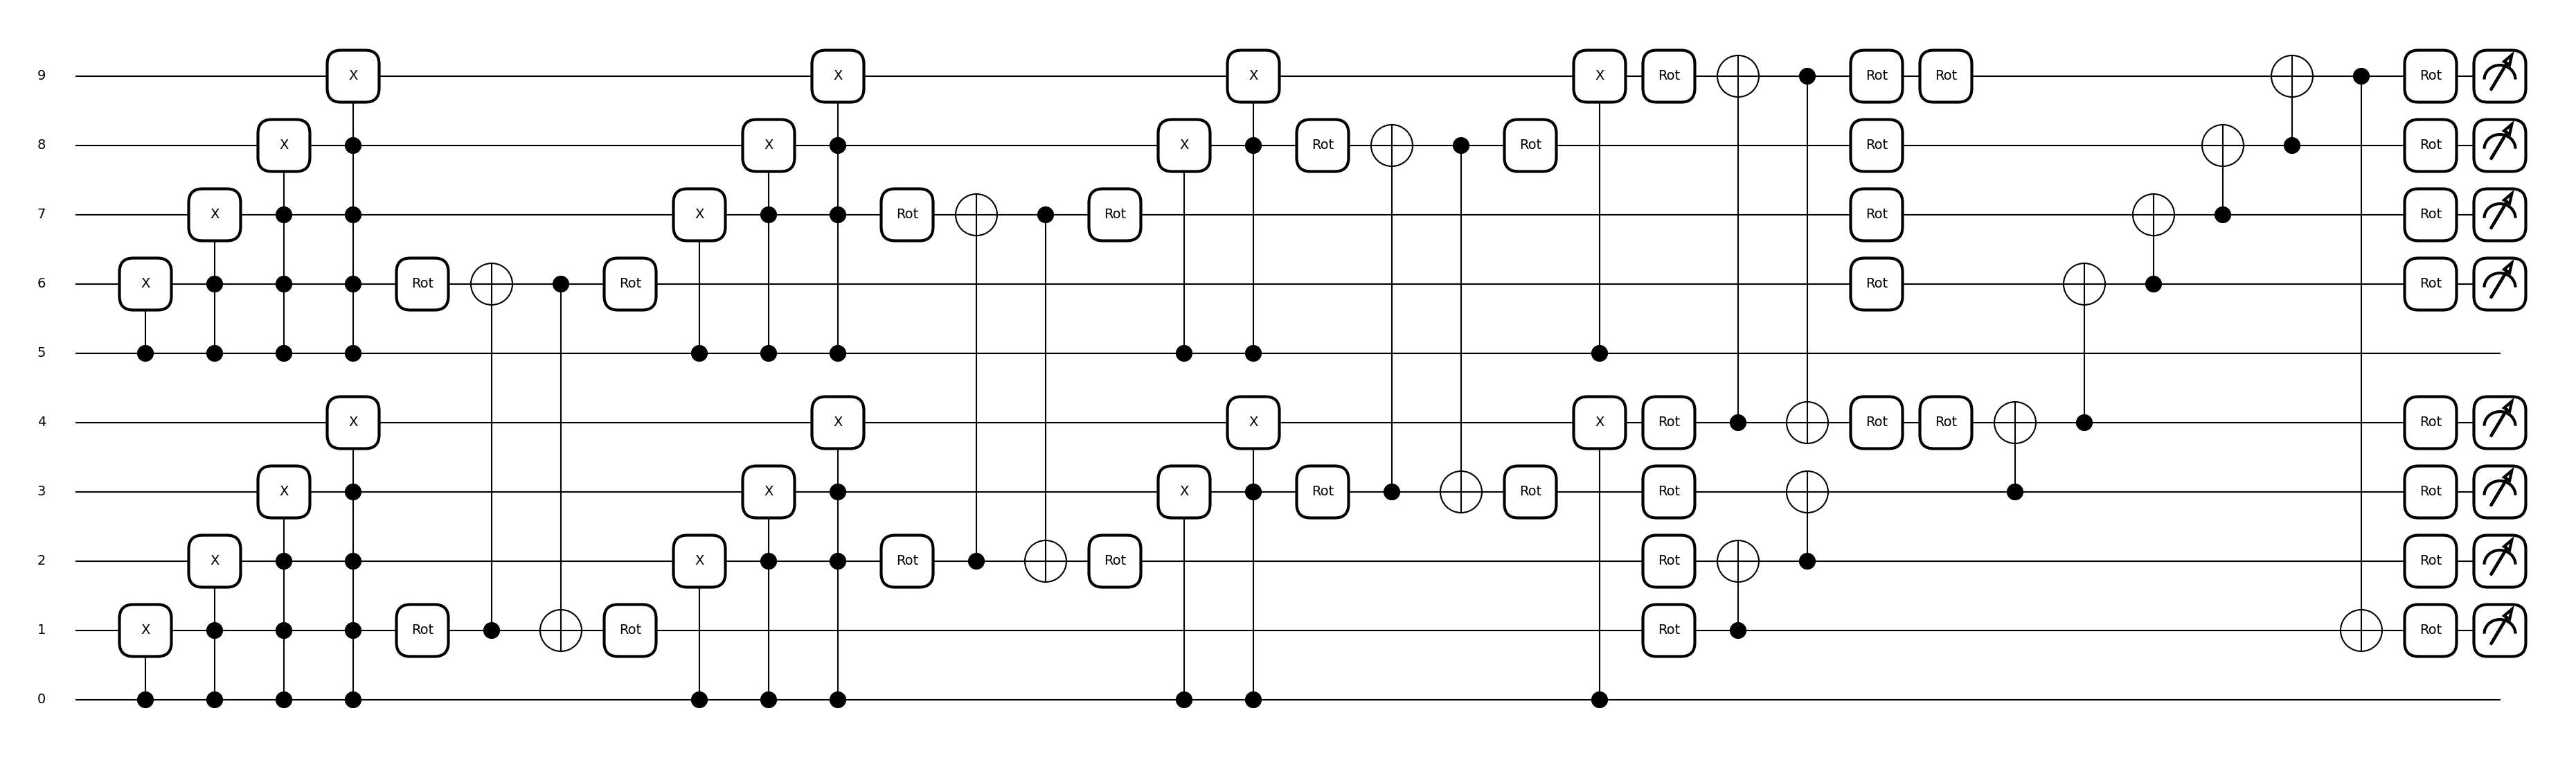

In [9]:
from thesis.quantum.operation.ansatz.convolution.v5 import ConvolutionAnsatz as A
# from thesis.quantum.operation.ansatz import BaselineAnsatz as A
from thesis.ml.data import BinaryData
from thesis.ml.optimize import Optimizer
from thesis.ml.data import image_transform
from thesis.experiment import Experiment
from thesis.cnn import CNN

dims = (28, 28)
num_layers = 4
silent = True

data = BinaryData(FashionMNIST, image_transform(dims, flatten=True), batch_size=(80, 1000))
# optimizer = Optimizer(SGD, lr=0.01, momentum=0.9, nesterov=True)
optimizer = Optimizer(Adam)
qcnn = QCNN.with_logging(data, optimizer, CrossEntropyLoss(), epoch=1)

qcnn.ansatz = A.from_dims(dims, num_layers=num_layers)
display(qcnn.ansatz.draw(decompose=True))

In [6]:
experiment = Experiment(qcnn, num_trials, results_schema=["accuracy"])
# results = experiment(dims, num_layers, silent=silent)
results = experiment(A, dims, silent=silent, num_layers=num_layers)

experiment.draw()

acc = results["accuracy"]
acc.median(), acc.mean(), acc.std()

2023-06-05 22:57:08,938: (qcnn_trial_0) Number of Parameters: 66


KeyboardInterrupt: 

Variables to consider:
- __batch, epoch__
- Operation on "ancilla" qubits (pre, post, none)
- Filter Ansatz
- Fully-connected Ansatz
- Which qubits to apply Fully-connected
- Which qubits to measure